## UseCase Intro: Employee Attrition
## You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem?

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate

#### What can be done to solve the problem ?

1. Identify the employees who may leave in future.
  - Targeted approaches can be undertaken to retain such employees.
  - These might include addressing their problems with the company and so on ...

2. Help identify the key indicators/factors leading to an employee leaving.
  - #### What all reasons can you think of contributing to attrition ?
    - Forcing employees to come to office daily
    - Unhealthy culture etc
  - Identifying these key factors helps in taking better measures to improve employee retention



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

### Now lets import our dataset


In [7]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 30.6MB/s]


In [8]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### What can we see from this info ?
- The dataset has around 1500 samples
- It contains information about :

    1. Employee demographics\
     Eg: Age, Gender, Marital Status

    2. Employee work-life\
     Eg: Working hours, job satisfaction etc

#### How can we use this information for our problem ?

To understand this lets analyze the features


### EDA

First lets try to find their ditsributions

#### How can we do that ?
- Plotting their histograms
- Recall why we do that ?

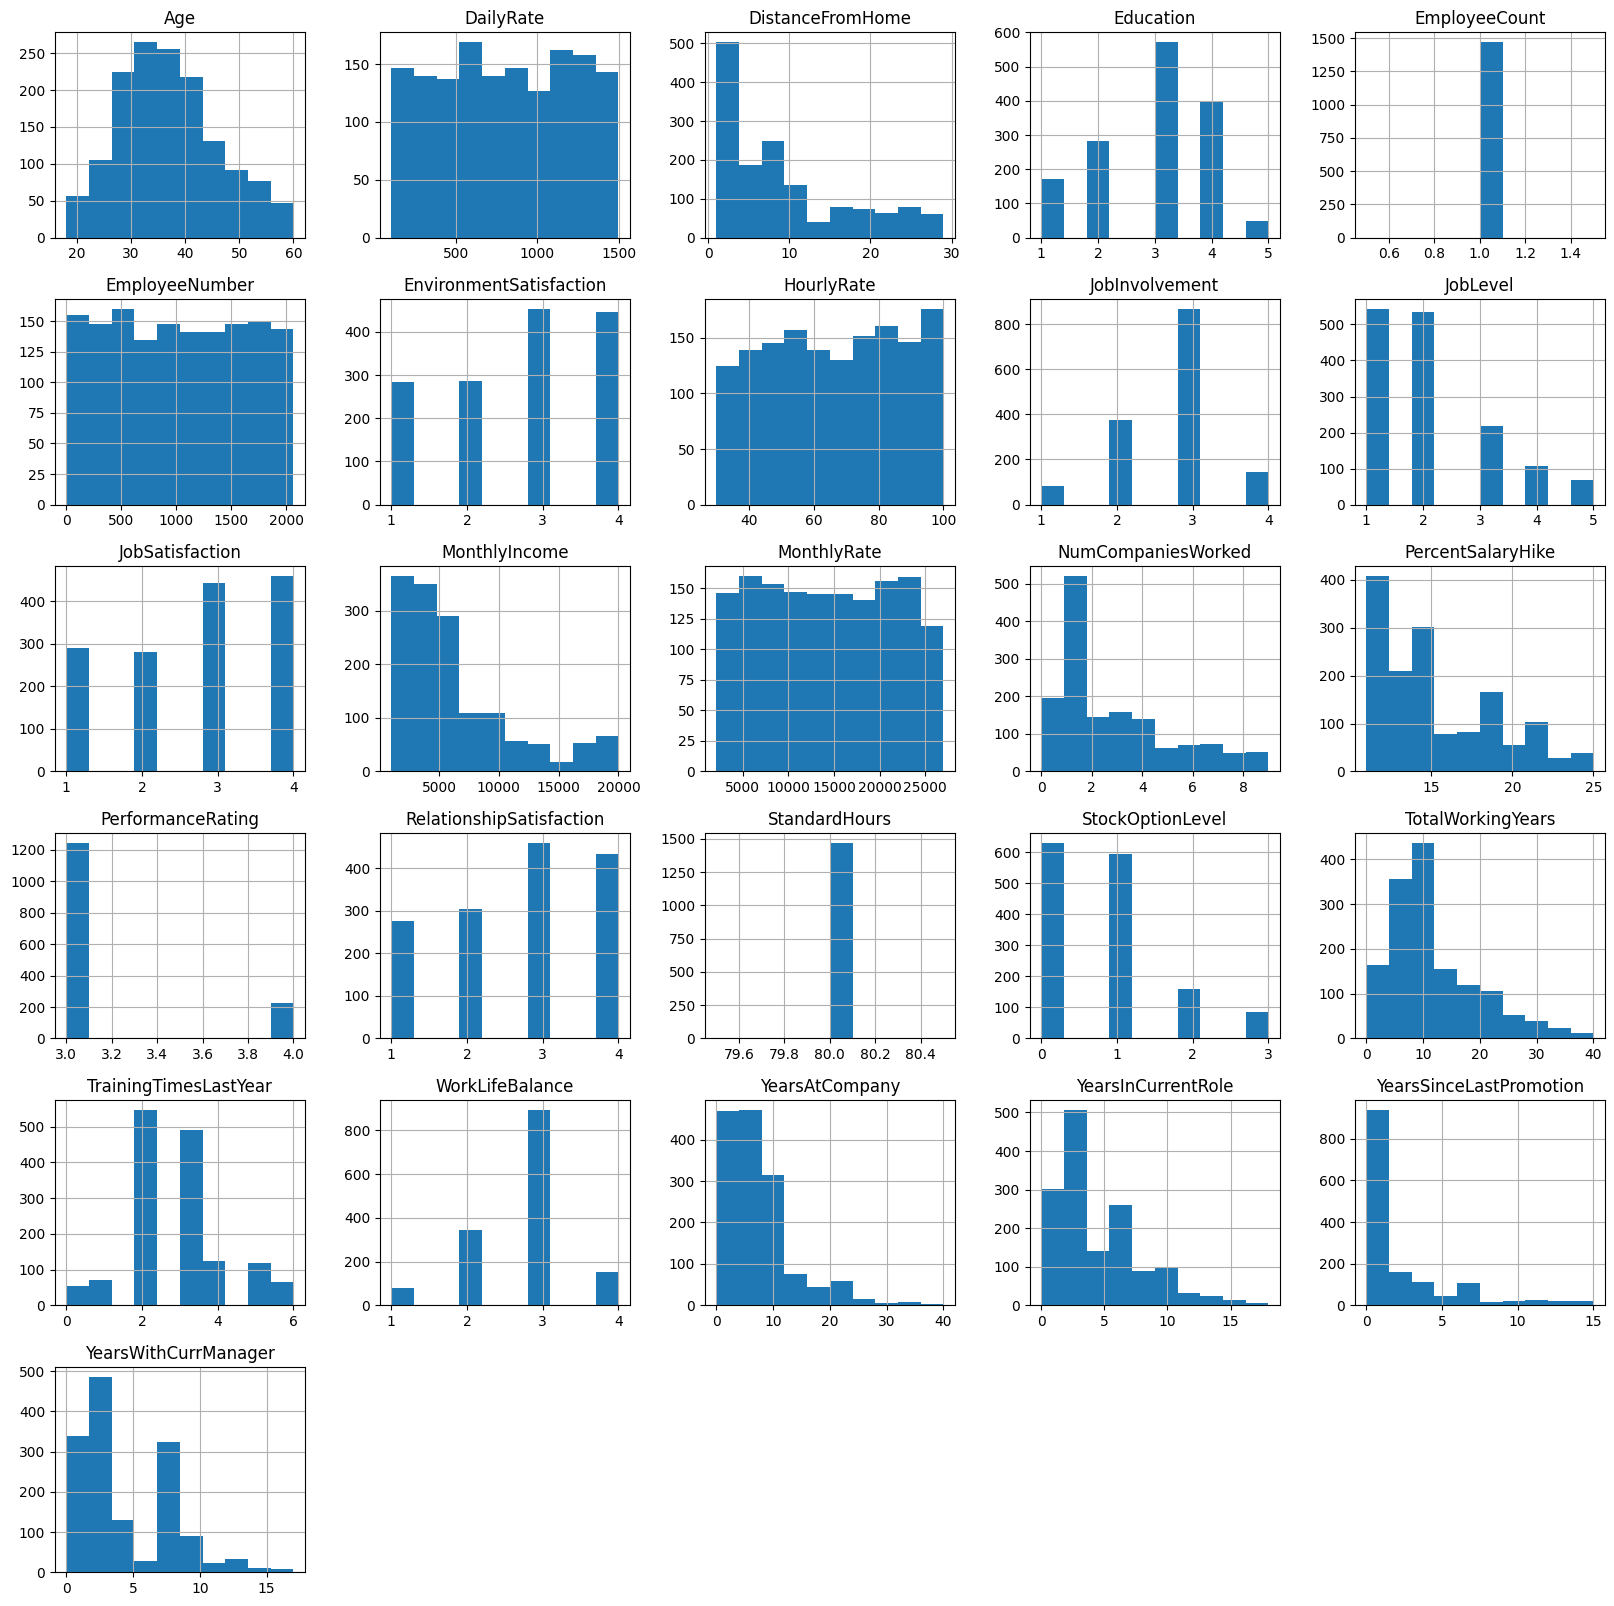

In [10]:
df.hist(figsize = (20,20))
plt.show()

#### What can we observe from these plots ?

1. Many histograms are tail-heavy;

  - Lot of attributes are right-skewed\
 (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany)

  - Data transformation methods **may be** required for standardisation
    - Recall why standardisation is preferred ?

2. Some features seem to have normal distributions

  - Eg: Age:
    - Slightly right-skewed normal distribution
    - Bulk of the staff between 25 and 45 years old

3. Some features are constant

  - Eg: EmployeeCount and StandardHours are constant values for all employees.

  - They're likely to be redundant features.

  - #### How can these features contribute to our problem ?
    - Constant features are not in any way useful for predictions
    - So we can drop these features from the dataset

4. Some features seem to be uniformly distributed.

  - Eg: EmployeeNumber

  - **Uniformly distributed and constant features won't contribute** to our analysis. Why?
    - Each value is equally likely to occur

  - #### So what should we do ?
    - We can drop these features from our dataset

5. Some features are categorical i.e **binomially/multinomially distributed**

  - Eg: WorkLifeBalance, StockOptionLevel etc

  - #### Can we use these features directly in our problem ?
    - No. They willl first have to be encoded

  - #### Recall which encoding has to be used for which features

    - Binary Encoding (0/1) : Features with only 2 unique values

    - Label Encoding (0, 1, 2, 3 ....) :  More than 2 unique values having a particular order

  - OneHot Encoding ([0 0 0 1], ...) : More than 2 unique values having no order

  - Target encoding ([0.1, 0.33, .....)] : Features with a lot of unique vals having no order


7. We can also see from these features that their ranges vary a lot

  - Recall why different feature scales can be a problem

  - We will deal with this problem later

First, lets remove the features that won't contribute to our analysis


In [11]:
df.shape

(1470, 35)

In [12]:
for col in df.columns:
  print(f"{col} has {df[col].nunique()}  values")

Age has 43  values
Attrition has 2  values
BusinessTravel has 3  values
DailyRate has 886  values
Department has 3  values
DistanceFromHome has 29  values
Education has 5  values
EducationField has 6  values
EmployeeCount has 1  values
EmployeeNumber has 1470  values
EnvironmentSatisfaction has 4  values
Gender has 2  values
HourlyRate has 71  values
JobInvolvement has 4  values
JobLevel has 5  values
JobRole has 9  values
JobSatisfaction has 4  values
MaritalStatus has 3  values
MonthlyIncome has 1349  values
MonthlyRate has 1427  values
NumCompaniesWorked has 10  values
Over18 has 1  values
OverTime has 2  values
PercentSalaryHike has 15  values
PerformanceRating has 2  values
RelationshipSatisfaction has 4  values
StandardHours has 1  values
StockOptionLevel has 4  values
TotalWorkingYears has 40  values
TrainingTimesLastYear has 7  values
WorkLifeBalance has 4  values
YearsAtCompany has 37  values
YearsInCurrentRole has 19  values
YearsSinceLastPromotion has 16  values
YearsWithCur

In [13]:
uniq_col = []
non_useful_col = []
for col in df.columns:
  if df[col].nunique() ==1:
    uniq_col.append(col)
  elif df[col].nunique() == df.shape[0]:
    non_useful_col.append(col)


In [14]:
df.drop(columns=uniq_col, inplace=True)
df.drop(columns=non_useful_col, inplace=True)


In [15]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols =df.select_dtypes(include='object').columns.tolist()

Numerical columns

In [16]:
len(num_cols)

23

In [17]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
can_be_log_trns_col = ['MonthlyIncome','DistanceFromHome','YearsAtCompany','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager']

In [19]:
26/4

6.5

In [20]:
26//4

6

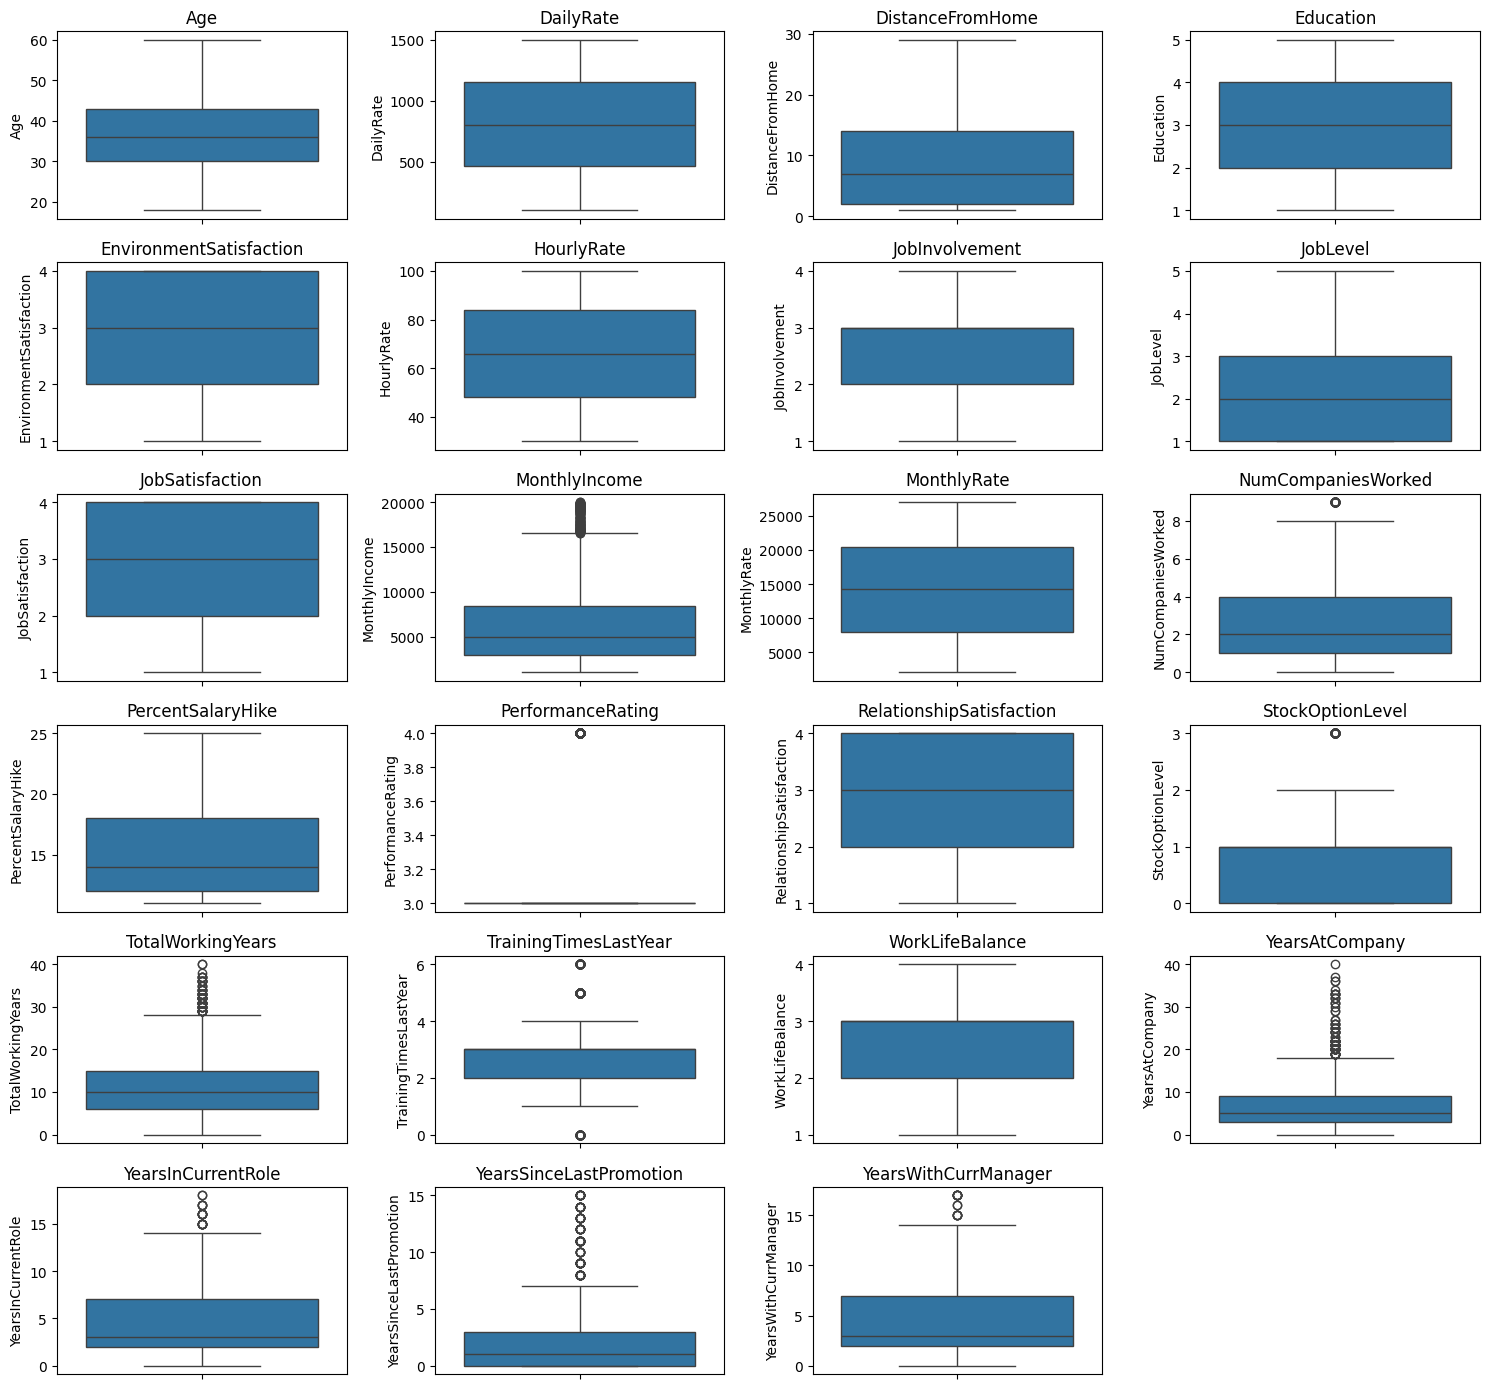

In [21]:
num_plots = len(num_cols)
num_rows = (num_plots +3)//4
num_cols_per_row = 4

plt.figure(figsize=(15 ,14 ))

for index, col_name in enumerate(num_cols):
  plt.subplot(num_rows, num_cols_per_row, index+1)
  sns.boxplot(df[col_name])
  plt.title(col_name)
plt.tight_layout()
plt.show()



## 1️⃣ What we observe from these plots (structured analysis)

### A. Right-skewed / tail-heavy numerical features

Examples:

* `MonthlyIncome`
* `DistanceFromHome`
* `YearsAtCompany`
* `TotalWorkingYears`
* `YearsInCurrentRole`
* `YearsWithCurrManager`

**What this means**

* Majority of employees have **low to moderate values**
* Few employees have **very large values** → long right tail

**Why it matters**

* Models sensitive to scale (Logistic Regression, KNN, SVM) can get dominated
* Distance-based models suffer
* Mean ≠ representative value

👉 **Action later**:

* Log / Power / Quantile transformation
* Then scaling

---

### B. Approximately normal features

Example:

* `Age`

**Observation**

* Slight right skew
* Bulk between **25–45 years**

**Why it’s good**

* Linear models like normally distributed predictors
* Scaling alone is usually enough

---

### C. Constant features 🚫

Examples:

* `EmployeeCount`
* `StandardHours`

**Observation**

* Single unique value

**Why useless**

* Zero variance
* No information gain
* No split possible in trees
* Coefficient will be zero in linear models

👉 **Action**: Drop immediately

---

### D. Uniformly distributed identifiers 🚫

Example:

* `EmployeeNumber`

**Observation**

* Almost uniform
* Acts like an ID

**Why useless**

* No relationship with target
* No pattern
* Each value equally likely

👉 **Action**: Drop

---

### E. Discrete ordinal categorical features

Examples:

* `WorkLifeBalance (1–4)`
* `StockOptionLevel (0–3)`
* `Education (1–5)`
* `JobLevel (1–5)`

**Observation**

* Finite integer levels
* Order exists

👉 **Encoding later**:

* Label / Ordinal encoding
* Scaling optional (depends on model)

---

### F. Binary categorical features

Examples:

* `Attrition`
* `OverTime`
* `Gender`

👉 **Encoding**:

* Binary (0/1)

---

### G. Nominal categorical features

Examples:

* `Department`
* `JobRole`
* `EducationField`
* `MaritalStatus`
* `BusinessTravel`

👉 **Encoding**:

* One-Hot Encoding
* Target Encoding (if high cardinality)

---

## 2️⃣ EDA — step by step (clean & reusable)


## Step 1: Separate column types

```python
num_cols = df.select_dtypes(include='int64').columns
cat_cols = df.select_dtypes(include='object').columns

```

---

## Step 2: Distribution plots for numerical features

```python
plt.figure(figsize=(20, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 5, i)
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.tight_layout()

plt.show()
```


---

## Step 3: Detect constant features 🚫

```python
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
constant_cols
```

---

## Step 4: Detect identifier-like features 🚫

```python
df['EmployeeNumber'].nunique(), df.shape[0]
```

👉 Acts like an ID

---

## Step 5: Skewness check (numeric)

```python
skewness = df[num_cols].skew().sort_values(ascending=False)
skewness
```

Interpretation:

* `skew > 1` → highly right skewed
* `0.5 < skew < 1` → moderate skew
* `≈ 0` → symmetric

---

## Step 6: Boxplots (outliers & spread)

```python
plt.figure(figsize=(18, 10))
df[num_cols].boxplot(rot=90)
plt.title("Boxplots of Numerical Features")
plt.show()
```

✔️ Helps confirm long tails
✔️ Highlights extreme values

---

## Step 7: Categorical feature distribution

```python
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True))
```

Or visualize:

```python
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()
```





In [22]:
skewness  = df[num_cols].skew().sort_values(ascending=False)
skewness.head()

,0
YearsSinceLastPromotion,1.984290
PerformanceRating,1.921883
YearsAtCompany,1.764529
MonthlyIncome,1.369817
TotalWorkingYears,1.117172


In [23]:
high_skewed = skewness[skewness>=1]
low_skewed = skewness[(1>skewness) & (skewness>=0.5)]
no_skewed = skewness[skewness<=0.5]

* high_skewed are Highly right-skewed (must treat)
* low_skewed are Moderately right-skewed (nice to treat)
* no_skewed are Almost symmetric (leave)

Note:

 a. only Continuous numerical features ["log1p" (safe for zeros) or "PowerTransformer" (Yeo-Johnson)]

 b. Ordinal numerical should not be transformed

In [24]:
df[high_skewed.index.tolist()].head()

,YearsSinceLastPromotion,PerformanceRating,YearsAtCompany,MonthlyIncome,TotalWorkingYears,NumCompaniesWorked,JobLevel
0,0,3,6,5993,8,8,2
1,1,4,10,5130,10,1,2
2,0,3,0,2090,7,6,1
3,3,3,8,2909,8,1,1
4,2,3,2,3468,6,9,1


In [25]:
from sklearn.preprocessing import PowerTransformer

# After finding continuous cols
cont_cols = [
    'MonthlyIncome','TotalWorkingYears','YearsAtCompany',
    'DistanceFromHome','NumCompaniesWorked',
    'YearsInCurrentRole','YearsWithCurrManager',
    'YearsSinceLastPromotion'
]

pt = PowerTransformer(method= "yeo-johnson")
df[cont_cols] = pt.fit_transform(df[cont_cols])

## Categorical Columns

Now lets encode our categorical features

#### Which encoding technique should we use ?

  - It depends upon:
    - Number of unique values a feature has
    - If there is a sequence between the feature vals

Lets first check how many unique values each feature has


In [26]:
for col in cat_cols:
    print(df[col].value_counts(normalize=True))
    print("*"*50)


Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
**************************************************
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
**************************************************
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
**************************************************
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64
**************************************************
Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64
**************************************************
JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laborator

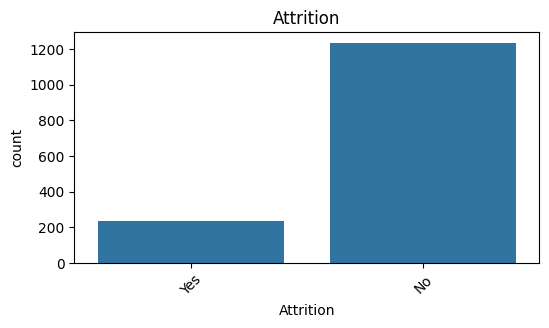

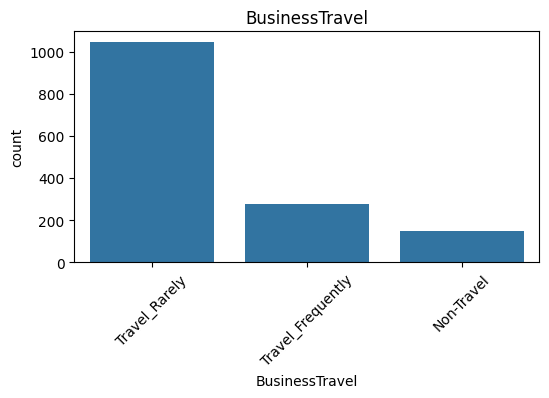

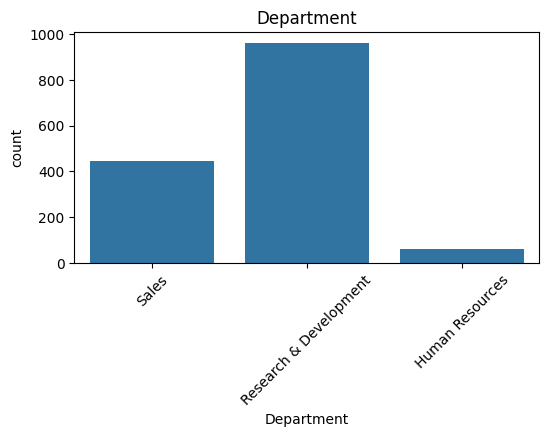

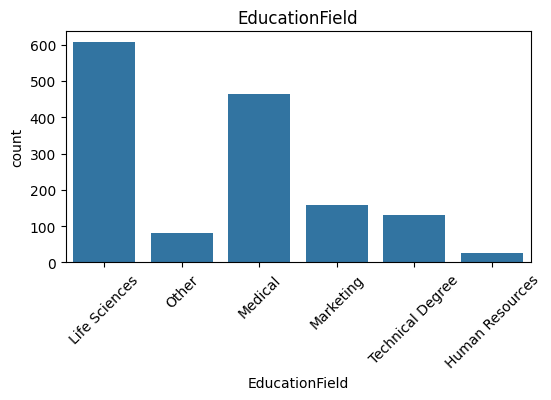

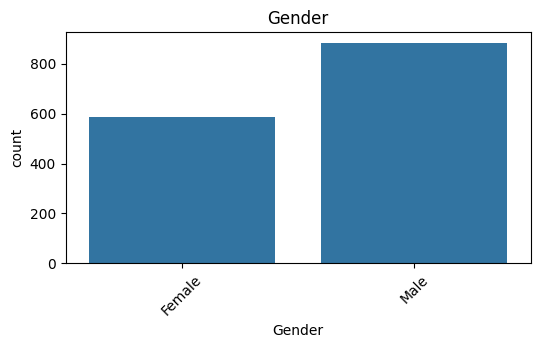

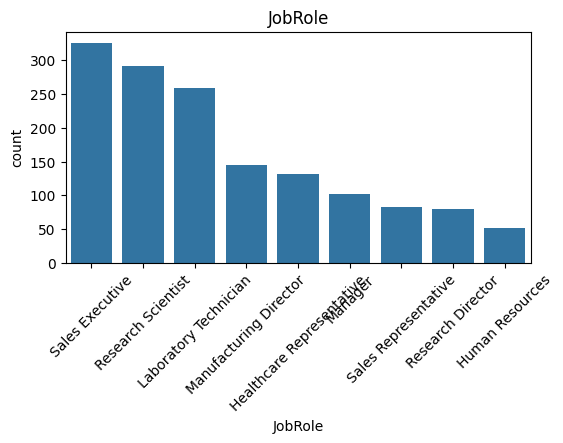

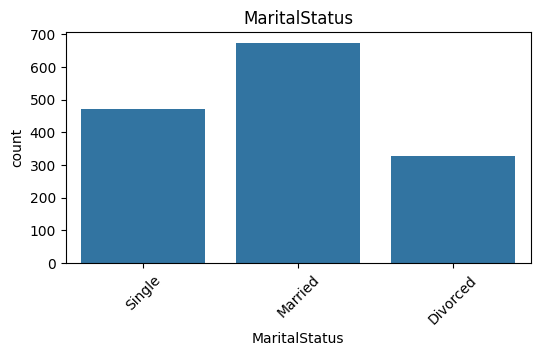

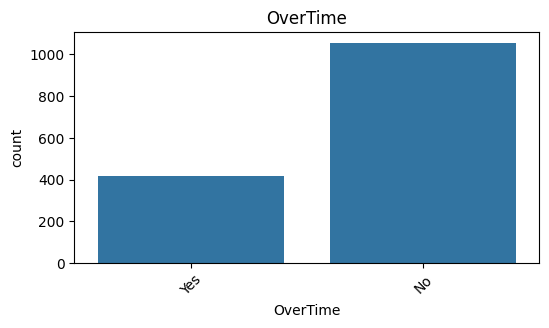

In [27]:
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


## Checked relation of categorical (nominal + ordinal) and numerical columns with target column

we can check this while doing univariate analysis



## 1️⃣ Why checking feature vs target matters

You’re doing **univariate analysis**:

> “Does this feature *alone* show any relationship with Attrition?”

This helps you:

* Spot **strong predictors early**
* Catch **leakage or useless features**
* Choose **better encodings**
* Avoid wasting effort on dead features

But doing it **blindly for every column the same way** is wrong.

---

## 2️⃣ What you should check (by feature type)

### A️. Categorical features → YES, check ALL

For **categorical vs binary target**, crosstab is exactly right.

```python
cat_cols = df.select_dtypes(include='object').columns.drop('Attrition')

for col in cat_cols:
    print(f"\n{col}")
    print(pd.crosstab(df[col], df['Attrition'], normalize='index'))
```

Why?

* Attrition is categorical (Yes/No)
* Crosstab shows **probability of attrition per category**
* Very interpretable

---

### B️. Ordinal numerical features → YES, but grouped


Crosstab is still meaningful:

```python
ord_cols = [
    'JobLevel','WorkLifeBalance',
    'StockOptionLevel','Education'
]

for col in ord_cols:
    print(f"\n{col}")
    print(pd.crosstab(df[col], df['Attrition'], normalize='index'))
```

---

### C️. Continuous numerical features

For columns like:

* `MonthlyIncome`
* `Age`
* `TotalWorkingYears`

Crosstab is misleading because:

* Too many unique values
* Sparse counts
* No pattern visibility

👉 Use **summary statistics + plots** instead.

---

## 3️⃣ Correct ways to check continuous vs target

### Option 1: Grouped statistics (simple & effective)

```python
cont_cols = [
    'Age','MonthlyIncome','TotalWorkingYears',
    'YearsAtCompany','DistanceFromHome'
]

df.groupby('Attrition')[cont_cols].mean()
```

You’ll often see:

* Higher income → lower attrition
* More experience → lower attrition

---

### Option 2: Boxplots (visual intuition)

```python
for col in cont_cols:
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(col)
    plt.show()
```

---

### Option 3: Statistical test (optional but strong)

```python
from scipy.stats import ttest_ind

for col in cont_cols:
    yes = df[df['Attrition']=='Yes'][col]
    no  = df[df['Attrition']=='No'][col]
    stat, p = ttest_ind(yes, no)
    print(f"{col}: p-value = {p:.4f}")
```

* `p < 0.05` → statistically significant difference

---

## 4️⃣ Should you check ALL columns?

### ✔️ Do this:

* All **categorical**
* All **ordinal**
* Most **continuous**



---

## 5️⃣ Practical EDA checklist (what interviewers like)

| Feature type | Method                    |
| ------------ | ------------------------- |
| Binary cat   | Crosstab                  |
| Nominal cat  | Crosstab                  |
| Ordinal      | Crosstab + mean           |
| Continuous   | Mean + boxplot            |
| Skewed cont  | Boxplot + transform later |




In [28]:
# categorical(nominal) col
for col in cat_cols:
    print(f"\n{col}")
    print(pd.crosstab(df[col], df['Attrition'], normalize='index'))


Attrition
Attrition   No  Yes
Attrition          
No         1.0  0.0
Yes        0.0  1.0

BusinessTravel
Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569

Department
Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278

EducationField
Attrition               No       Yes
EducationField                      
Human Resources   0.740741  0.259259
Life Sciences     0.853135  0.146865
Marketing         0.779874  0.220126
Medical           0.864224  0.135776
Other             0.865854  0.134146
Technical Degree  0.757576  0.242424

Gender
Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068

JobRole
Attrition                  

What this analysis actually tells you (big picture)

What you computed is conditional probability:

```
P(Attrition = Yes∣Feature = category)
```
So you are asking:

“Given a value of this feature, how likely is attrition?”

This is univariate signal strength, not final feature importance.

In [29]:
# ordinal columns

ord_cols = [
    'JobLevel','WorkLifeBalance',
    'StockOptionLevel','Education'
]

for col in ord_cols:
    print(f"\n{col}")
    print(pd.crosstab(df[col], df['Attrition'], normalize='index'))



JobLevel
Attrition        No       Yes
JobLevel                     
1          0.736648  0.263352
2          0.902622  0.097378
3          0.853211  0.146789
4          0.952830  0.047170
5          0.927536  0.072464

WorkLifeBalance
Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471

StockOptionLevel
Attrition               No       Yes
StockOptionLevel                    
0                 0.755943  0.244057
1                 0.906040  0.093960
2                 0.924051  0.075949
3                 0.823529  0.176471

Education
Attrition        No       Yes
Education                    
1          0.817647  0.182353
2          0.843972  0.156028
3          0.826923  0.173077
4          0.854271  0.145729
5          0.895833  0.104167


In [30]:
# numerical col
cont_cols = [
    'Age','MonthlyIncome','TotalWorkingYears',
    'YearsAtCompany','DistanceFromHome'
]

df.groupby('Attrition')[cont_cols].mean()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,DistanceFromHome
Attrition,,,,,
No,37.561233,0.090143,0.094185,0.084794,-0.034290
Yes,33.607595,-0.468972,-0.490000,-0.441142,0.178396


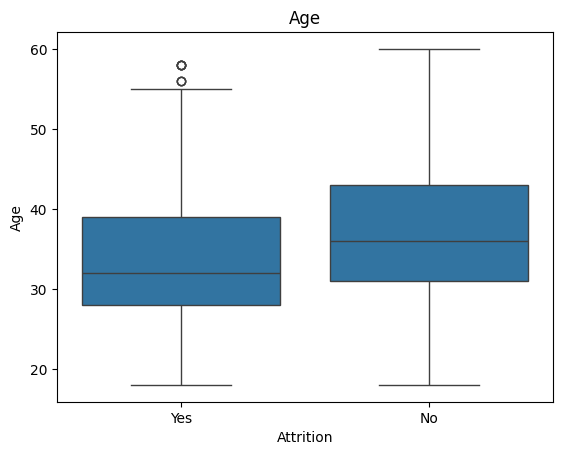

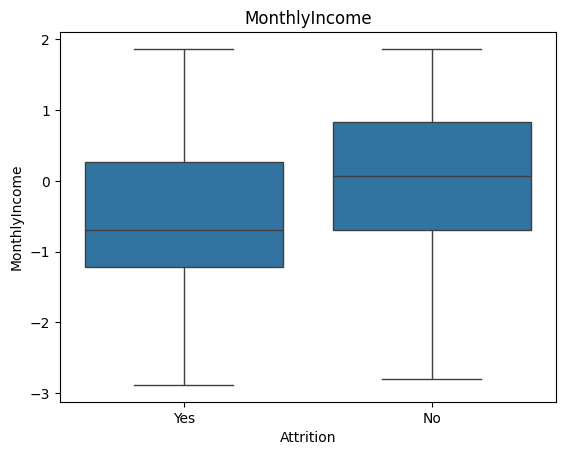

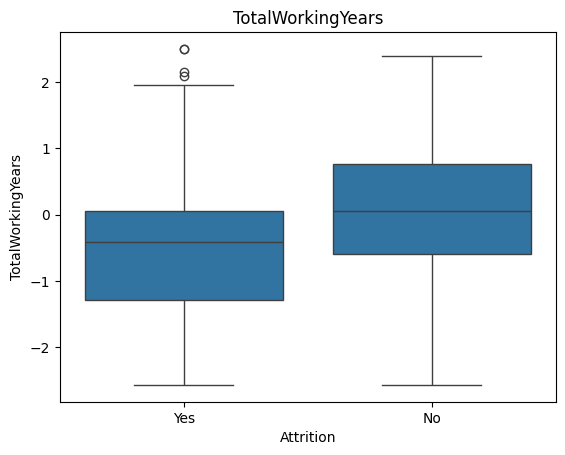

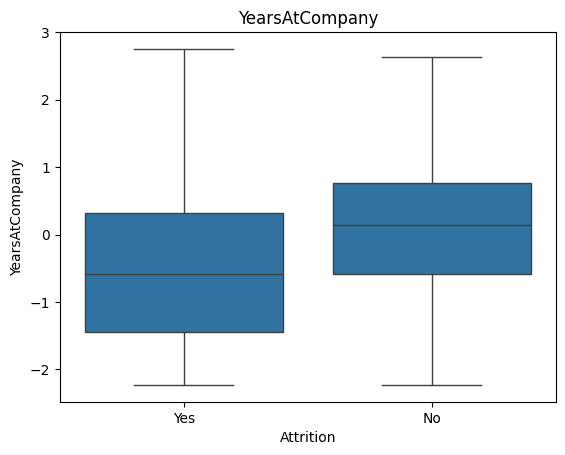

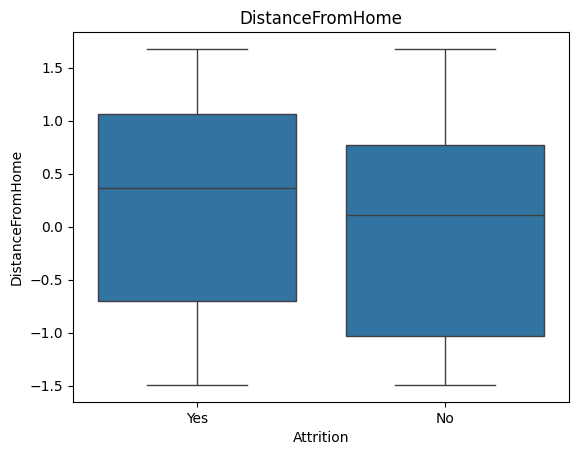

In [31]:
for col in cont_cols:
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(col)
    plt.show()


In [32]:
for col in cat_cols:
  print(f" {col} has {df[col].nunique()}")

 Attrition has 2
 BusinessTravel has 3
 Department has 3
 EducationField has 6
 Gender has 2
 JobRole has 9
 MaritalStatus has 3
 OverTime has 2


#### On basis of this info, which encoding technique should we use ?

 - We will use binary encoding for features with 2 or less unique val.
 - For features < 6 unique vals we will use OneHot encoding
 - Rest of the categorical features will be Target encoded


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

def label_encode(ser):

    if ser.dtype=="object" and ser.nunique() <= 2:
      print(ser.name)

      le.fit(ser)
      ser = le.transform(ser)

    return ser

df = df.apply(lambda col: label_encode(col))

Attrition
Gender
OverTime


In [34]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, columns = ["BusinessTravel", "Department", "MaritalStatus"], drop_first = True)

In [35]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,-1.494085,2,Life Sciences,2,0,94,3,...,0.139692,0.205562,-1.094862,0.490147,False,True,False,True,False,True
1,49,0,279,0.243416,1,Life Sciences,3,1,61,2,...,0.762660,0.883888,0.096854,0.909635,True,False,True,False,True,False
2,37,1,1373,-1.031215,2,Other,4,1,92,2,...,-2.229592,-1.596434,-1.094862,-1.550156,False,True,True,False,False,True
3,33,0,1392,-0.700347,4,Life Sciences,4,0,56,3,...,0.482432,0.883888,0.905592,-1.550156,True,False,True,False,True,False
4,27,0,591,-1.031215,1,Medical,1,1,40,3,...,-0.951540,-0.446645,0.607464,-0.406881,False,True,True,False,True,False


#### Lets analyse the target feature now

In [36]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [37]:
target.value_counts()

,count
Attrition,
0,1233
1,237


#### What can we infer from this info ?
  - The dataset is extremely imbalanced
  - Recall how we deal with imbalanced data

For this dataset we will use SMOTE oversampling technique to balance the data

But SMOTE is applied only to training set

So we need to split the data first

#### In what sets should we split it ?

  - Train/test set

  - #### Why not create a validation set ?
    - We already have less amount of data
    - And we want to train the model with max possible data
    - So we will use K-Fold cross validation instead

#### What ratios should we use for splitting ?
  - 80%/20% for train/test looks enough

Lets split the dataset now

In [38]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 33)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 33)
Number transactions y_test dataset:  (368,)


In [39]:
len(X_train.columns)

33

Now we will first perform target encoding

In [40]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.6 MB/s eta 0:00:00


In [41]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

### Upsampling using SMOTE

In [42]:
!pip install imblearn

### SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


### ADASYN

In [44]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

Counter(y_ada)


Counter({0: 924, 1: 902})

| Aspect            | SMOTE               | ADASYN               |
| ----------------- | ------------------- | -------------------- |
| Sampling          | Uniform             | Adaptive             |
| Focus             | All minority points | Hard minority points |
| Noise sensitivity | Lower               | Higher               |
| Boundary learning | Average             | Better               |
| Stability         | More stable         | Less stable          |


Hyperparameter tuning (GridSearchCV)

You use StratifiedKFold instead of KFold because:
```
Your target is imbalanced and this is a classification problem.
StratifiedKFold preserves class proportions in every fold, KFold does not.
```
Since you’re using roc_auc, imbalance handling is critical.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 4, 5, 6, 8, None],
    'min_samples_leaf': [5, 10, 20, 30],
    'min_samples_split': [10, 20, 50],
    'criterion': ['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_smote = GridSearchCV(
    dt,
    param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

grid_smote.fit(X_train_sm, y_train_sm)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 8, None],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'min_samples_split': [10, 20, 50]},
             scoring='roc_auc')

Evaluate on TEST data (NO SMOTE used in test data)

In [47]:
from sklearn.metrics import classification_report, roc_auc_score

best_dt_smote = grid_smote.best_estimator_

y_test_prob_sm = best_dt_smote.predict_proba(X_test)[:, 1]
y_test_pred_sm = best_dt_smote.predict(X_test)

print("SMOTE + DT")
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob_sm))
print(classification_report(y_test, y_test_pred_sm))


SMOTE + DT
ROC-AUC: 0.6816411606604136
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       309
           1       0.35      0.46      0.39        59

    accuracy                           0.77       368
   macro avg       0.62      0.65      0.63       368
weighted avg       0.80      0.77      0.79       368



## Approach-2: Decision Tree with class_weight='balanced' (NO SMOTE)

In [48]:
dt_bal = DecisionTreeClassifier(random_state=42)

param_grid_bal = {
    'max_depth': [3, 4, 5, 6, 8],
    'min_samples_leaf': [10, 20, 30, 50],
    'min_samples_split': [10, 20, 50],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

grid_bal = GridSearchCV(
    dt_bal,
    param_grid_bal,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_bal.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_samples_leaf': [10, 20, 30, 50],
                         'min_samples_split': [10, 20, 50]},
             scoring='roc_auc')

Evaluate on TEST data

In [50]:
best_dt_bal = grid_bal.best_estimator_

y_test_prob_bal = best_dt_bal.predict_proba(X_test)[:, 1]
y_test_pred_bal = best_dt_bal.predict(X_test)

print("Balanced DT")
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob_bal))
print(classification_report(y_test, y_test_pred_bal))


Balanced DT
ROC-AUC: 0.7516592616971094
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       309
           1       0.36      0.66      0.47        59

    accuracy                           0.76       368
   macro avg       0.64      0.72      0.66       368
weighted avg       0.83      0.76      0.79       368



Compare both models

In [51]:
print("SMOTE + DT ROC-AUC :", roc_auc_score(y_test, y_test_prob_sm))
print("Balanced DT ROC-AUC:", roc_auc_score(y_test, y_test_prob_bal))


SMOTE + DT ROC-AUC : 0.6816411606604136
Balanced DT ROC-AUC: 0.7516592616971094


Hyperparameter tuning with GridSearchCV + SMOTE

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


Build pipeline

In [56]:
pipe = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
])


Why pipeline?

* SMOTE is applied inside each CV fold

* No leakage

* Clean and reusable

In [57]:
param_grid = {
    'dt__max_depth': [3, 4, 5, 6, 8, None],
    'dt__min_samples_leaf': [5, 10, 20, 30],
    'dt__min_samples_split': [10, 20, 50],
    'dt__criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold CV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',      # best for imbalance
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train, y_train)


# Best model and CV score

print("Best CV ROC-AUC:", grid.best_score_)
print("Best parameters:\n", grid.best_params_)


Best CV ROC-AUC: 0.6721865382463208
Best parameters:
 {'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 50}


In [58]:
best_model = grid.best_estimator_

y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       309
           1       0.34      0.39      0.37        59

    accuracy                           0.78       368
   macro avg       0.61      0.62      0.62       368
weighted avg       0.79      0.78      0.79       368

Test ROC-AUC: 0.7219296802150184


### Preprocessed data

In [59]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 34.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 34.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 21.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 24.0MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_sm = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_sm = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)